In [1]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
import sys
print(sys.executable)


C:\Users\tript\.conda\envs\tf-gpu\python.exe


In [3]:
TRAIN_DIR = r"D:\Facial-Detection-ad-Emotion-Recognition-main\test"
TEST_DIR = r"D:\Facial-Detection-ad-Emotion-Recognition-main\train"

In [4]:
!pip install pandas


In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                                  image     label
0     D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
1     D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
2     D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
3     D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
4     D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
...                                                 ...       ...
7173  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
7174  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
7175  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
7176  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
7177  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise

[7178 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                                                   image     label
0      D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
1      D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
2      D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
3      D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
4      D:\Facial-Detection-ad-Emotion-Recognition-mai...     angry
...                                                  ...       ...
28704  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
28705  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
28706  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
28707  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise
28708  D:\Facial-Detection-ad-Emotion-Recognition-mai...  surprise

[28709 rows x 2 columns]
0        D:\Facial-Detection-ad-Emotion-Recognition-mai...
1        D:\Facial-Detection-ad-Emotion-Recognition-mai...
2        D:\Facial-Detection-ad-Emotion-Recognition-

In [10]:
from tqdm.auto import tqdm

C:\Users\tript\.conda\envs\tf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = 'grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [12]:
train_features = extract_features(train['image']) 

100%|████████████████████████████████████████████████████████████████████████████| 7178/7178 [00:01<00:00, 4873.81it/s]


In [13]:
test_features = extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████████████████| 28709/28709 [00:05<00:00, 4989.68it/s]


In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
57/57 [==============================] - 55s 167ms/step - loss: 1.8468 - accuracy: 0.2340 - val_loss: 1.8167 - val_accuracy: 0.2513
Epoch 2/100
57/57 [==============================] - 8s 144ms/step - loss: 1.8248 - accuracy: 0.2420 - val_loss: 1.8148 - val_accuracy: 0.2513
Epoch 3/100
57/57 [==============================] - 8s 144ms/step - loss: 1.8218 - accuracy: 0.2456 - val_loss: 1.8160 - val_accuracy: 0.2513
Epoch 4/100
57/57 [==============================] - 8s 145ms/step - loss: 1.8151 - accuracy: 0.2410 - val_loss: 1.7994 - val_accuracy: 0.2553
Epoch 5/100
57/57 [==============================] - 8s 143ms/step - loss: 1.8027 - accuracy: 0.2516 - val_loss: 1.7908 - val_accuracy: 0.2597
Epoch 6/100
57/57 [==============================] - 8s 142ms/step - loss: 1.7943 - accuracy: 0.2522 - val_loss: 1.7951 - val_accuracy: 0.2617
Epoch 7/100
57/57 [==============================] - 8s 143ms/step - loss: 1.7597 - accuracy: 0.2678 - val_loss: 1.7095 - val_accuracy: 0.299

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.models import model_from_json

In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [26]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [28]:
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [29]:
image =r"D:\Facial-Detection-ad-Emotion-Recognition-main\test\sad\PrivateTest_2552088.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 489ms/step
model prediction is  sad


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 23ms/step
model prediction is  sad


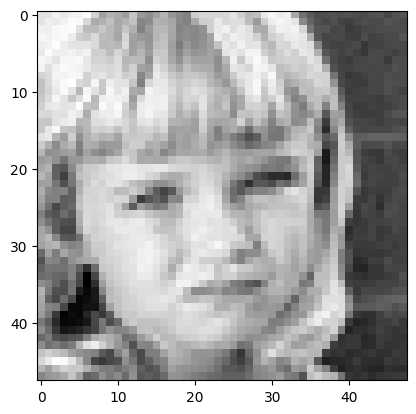

In [35]:
image = r"D:\Facial-Detection-ad-Emotion-Recognition-main\test\sad\PrivateTest_2552088.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 17ms/step
model prediction is  fear


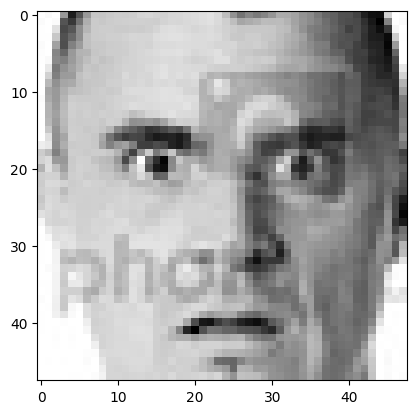

In [38]:
image = r"D:\Facial-Detection-ad-Emotion-Recognition-main\train\fear\Training_308765.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 21ms/step
model prediction is  disgust


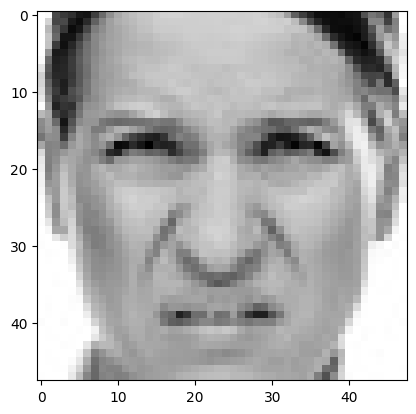

In [39]:
image = r"D:\Facial-Detection-ad-Emotion-Recognition-main\train\disgust\Training_680349.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 16ms/step
model prediction is  happy


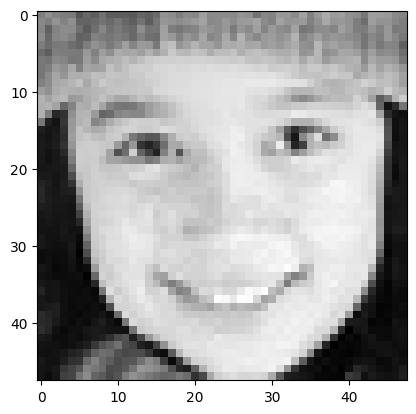

In [40]:
image = r"D:\Facial-Detection-ad-Emotion-Recognition-main\train\happy\Training_430147.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 19ms/step
model prediction is  surprise


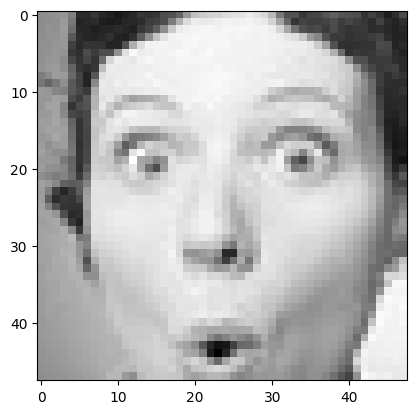

In [42]:
image = r"D:\Facial-Detection-ad-Emotion-Recognition-main\train\surprise\Training_336818.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')